# Graphics of Prades data and first lab results

### Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
control=[5,7,9,10]
drought=[2,3,4,6]

### Carbon stocks

In [521]:
con=pd.read_csv('~\\Model_Prades\\Data\\Prades_data_control.csv')
dro=pd.read_csv('~\\Model_Prades\\Data\\Prades_data_drought.csv')

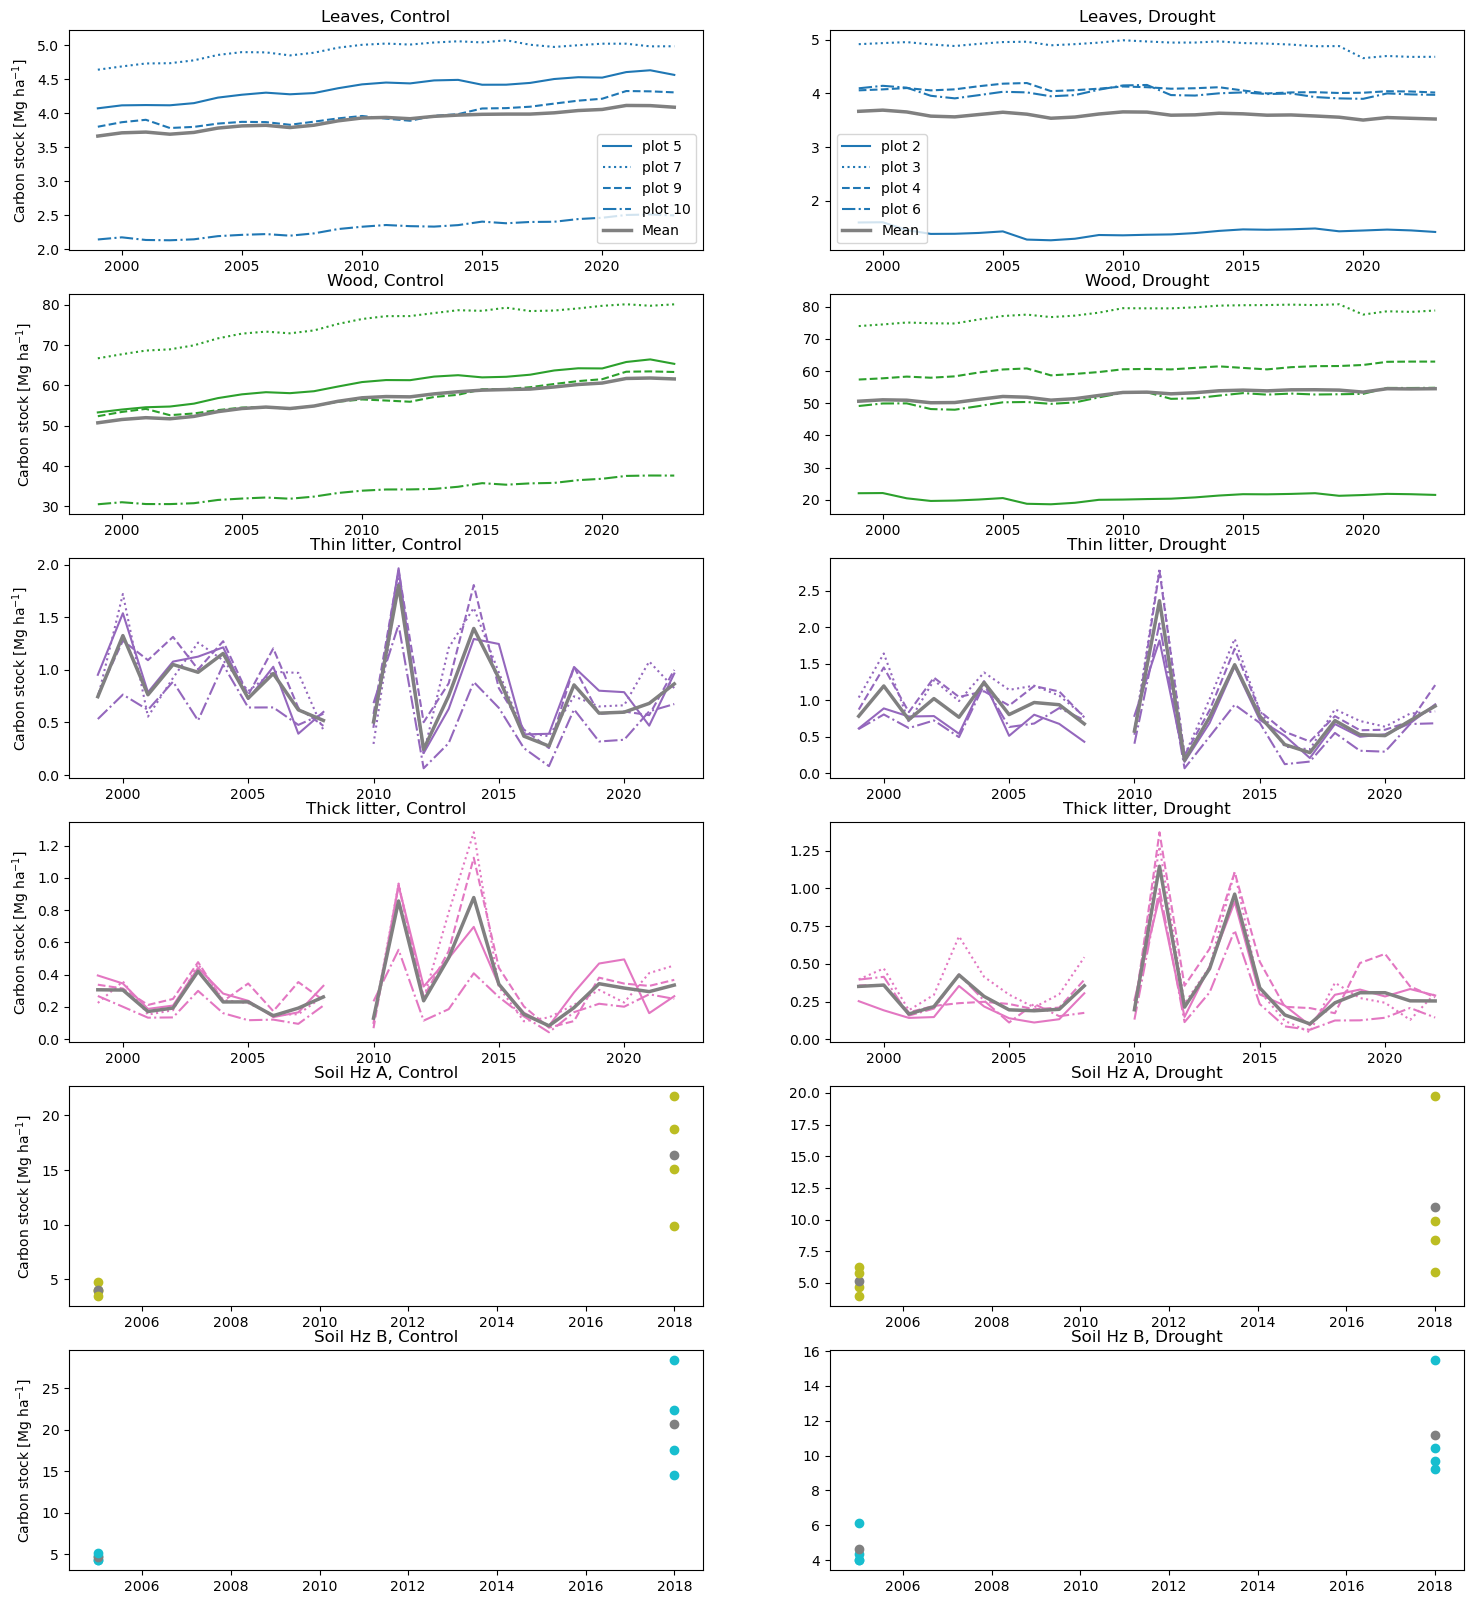

In [523]:
linestyle=['solid','dotted','dashed','dashdot']
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))

fig,axs=plt.subplots(6,2,figsize=[18,20])
for j in range(6):
    for i in range(4):
        axs[j,0].plot(con[con.Plot==control[i]].Year,con[con.Plot==control[i]][con.columns[j+2]],color=colors[j],linestyle=linestyle[i],label='plot '+str(control[i]))
        axs[j,1].plot(dro[dro.Plot==drought[i]].Year,dro[dro.Plot==drought[i]][dro.columns[j+2]],color=colors[j],linestyle=linestyle[i],label='plot '+str(drought[i]))
# Means       
        if i==3:
            w=con[['Year',con.columns[j+2]]]
            mean=np.zeros(25)
            for k in range(1999,2024):mean[k-1999]=w[w.Year==k].mean().iloc[1]
            axs[j,0].plot(con[con.Plot==control[0]].Year,mean,color='gray',label='Mean',linewidth=2.5)
            if j>3:axs[j,0].plot(con[con.Plot==control[0]].Year,mean,'o',color='gray')
           
            w=dro[['Year',dro.columns[j+2]]]
            mean=np.zeros(25)
            for k in range(1999,2024):mean[k-1999]=w[w.Year==k].mean().iloc[1]
            axs[j,1].plot(dro[dro.Plot==drought[0]].Year,mean,color='gray',label='Mean',linewidth=2.5)
            if j>3:axs[j,1].plot(dro[dro.Plot==drought[0]].Year,mean,'o',color='gray')
        
        axs[j,0].set_title(str(con.columns[j+2])+', Control'); axs[j,1].set_title(str(dro.columns[j+2])+', Drought')
        axs[j,0].set_ylabel('Carbon stock [Mg ha$^{-1}$]')
        if j>3:
            axs[j,0].plot(con[con.Plot==control[i]].Year,con[con.Plot==control[i]][con.columns[j+2]],'o',color=colors[j],label='plot '+str(control[i]),linestyle=linestyle[i])
            axs[j,1].plot(dro[dro.Plot==drought[i]].Year,dro[dro.Plot==drought[i]][dro.columns[j+2]],'o',color=colors[j],linestyle=linestyle[i],label='plot '+str(drought[i]))
    if j==0:axs[j,0].legend();axs[j,1].legend()

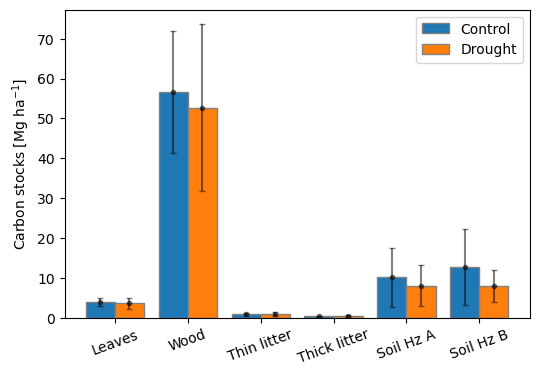

In [531]:
mm=np.zeros([2,6]); sd=np.zeros([2,6])
for i in range(len(tit)):
    mm[0,i]=con[tit[i]].mean(); sd[0,i]=con[tit[i]].std()
    mm[1,i]=dro[tit[i]].mean(); sd[1,i]=dro[tit[i]].std()

tit=con.columns[2:]
fig=plt.subplots(figsize=(6,4)) 
barWidth=0.4 
br1=np.arange(len(tit)) 
br2=[x+barWidth for x in br1] 

plt.bar(br1,mm[0,],width=barWidth,edgecolor='grey',label ='Control') 
plt.bar(br2,mm[1,],width=barWidth,edgecolor='grey',label ='Drought') 
plt.errorbar(br1,mm[0,],sd[0,],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.errorbar(br2,mm[1,],sd[1,],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel('Carbon stocks [Mg ha$^{-1}$]') 
plt.xticks([r+barWidth/2 for r in range(len(tit))],tit,rotation=20)
plt.legend()

### Demographic structure

In [567]:
data=pd.read_excel('~\\Model_Prades\\Data\\Estructura demográfica Prades.xlsx')

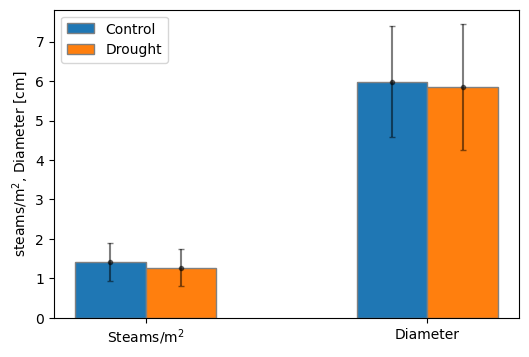

In [593]:
con=data[data['treatment']=='control']
dro=data[data['treatment']=='drought']

fig=plt.subplots(figsize=(6,4)) 
barWidth=0.25 
br1=np.arange(2) 
br2=[x+barWidth for x in br1]

plt.bar(br1,con[con.columns[2:]].mean(),width=barWidth,edgecolor='grey',label ='Control') 
plt.bar(br2,dro[dro.columns[2:]].mean(),width=barWidth,edgecolor='grey',label ='Drought') 

plt.errorbar(br1,con[con.columns[2:]].mean(),con[con.columns[2:]].std(),fmt='.',color='Black',alpha=0.5,capsize=2)
plt.errorbar(br2,dro[dro.columns[2:]].mean(),dro[dro.columns[2:]].std(),fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel('steams/m$^2$, Diameter [cm]') 
plt.xticks([r+barWidth/2 for r in range(2)],['Steams/m$^2$','Diameter'])
plt.legend()

### Meteo variables

In [7]:
data=pd.read_csv('~\\Model_Prades\\Data\\Climate\\Prades_hourly.csv')
data['datetime']=pd.to_datetime(data.datetime)

Text(0, 0.5, 'WS [m s$^{-1}$]')

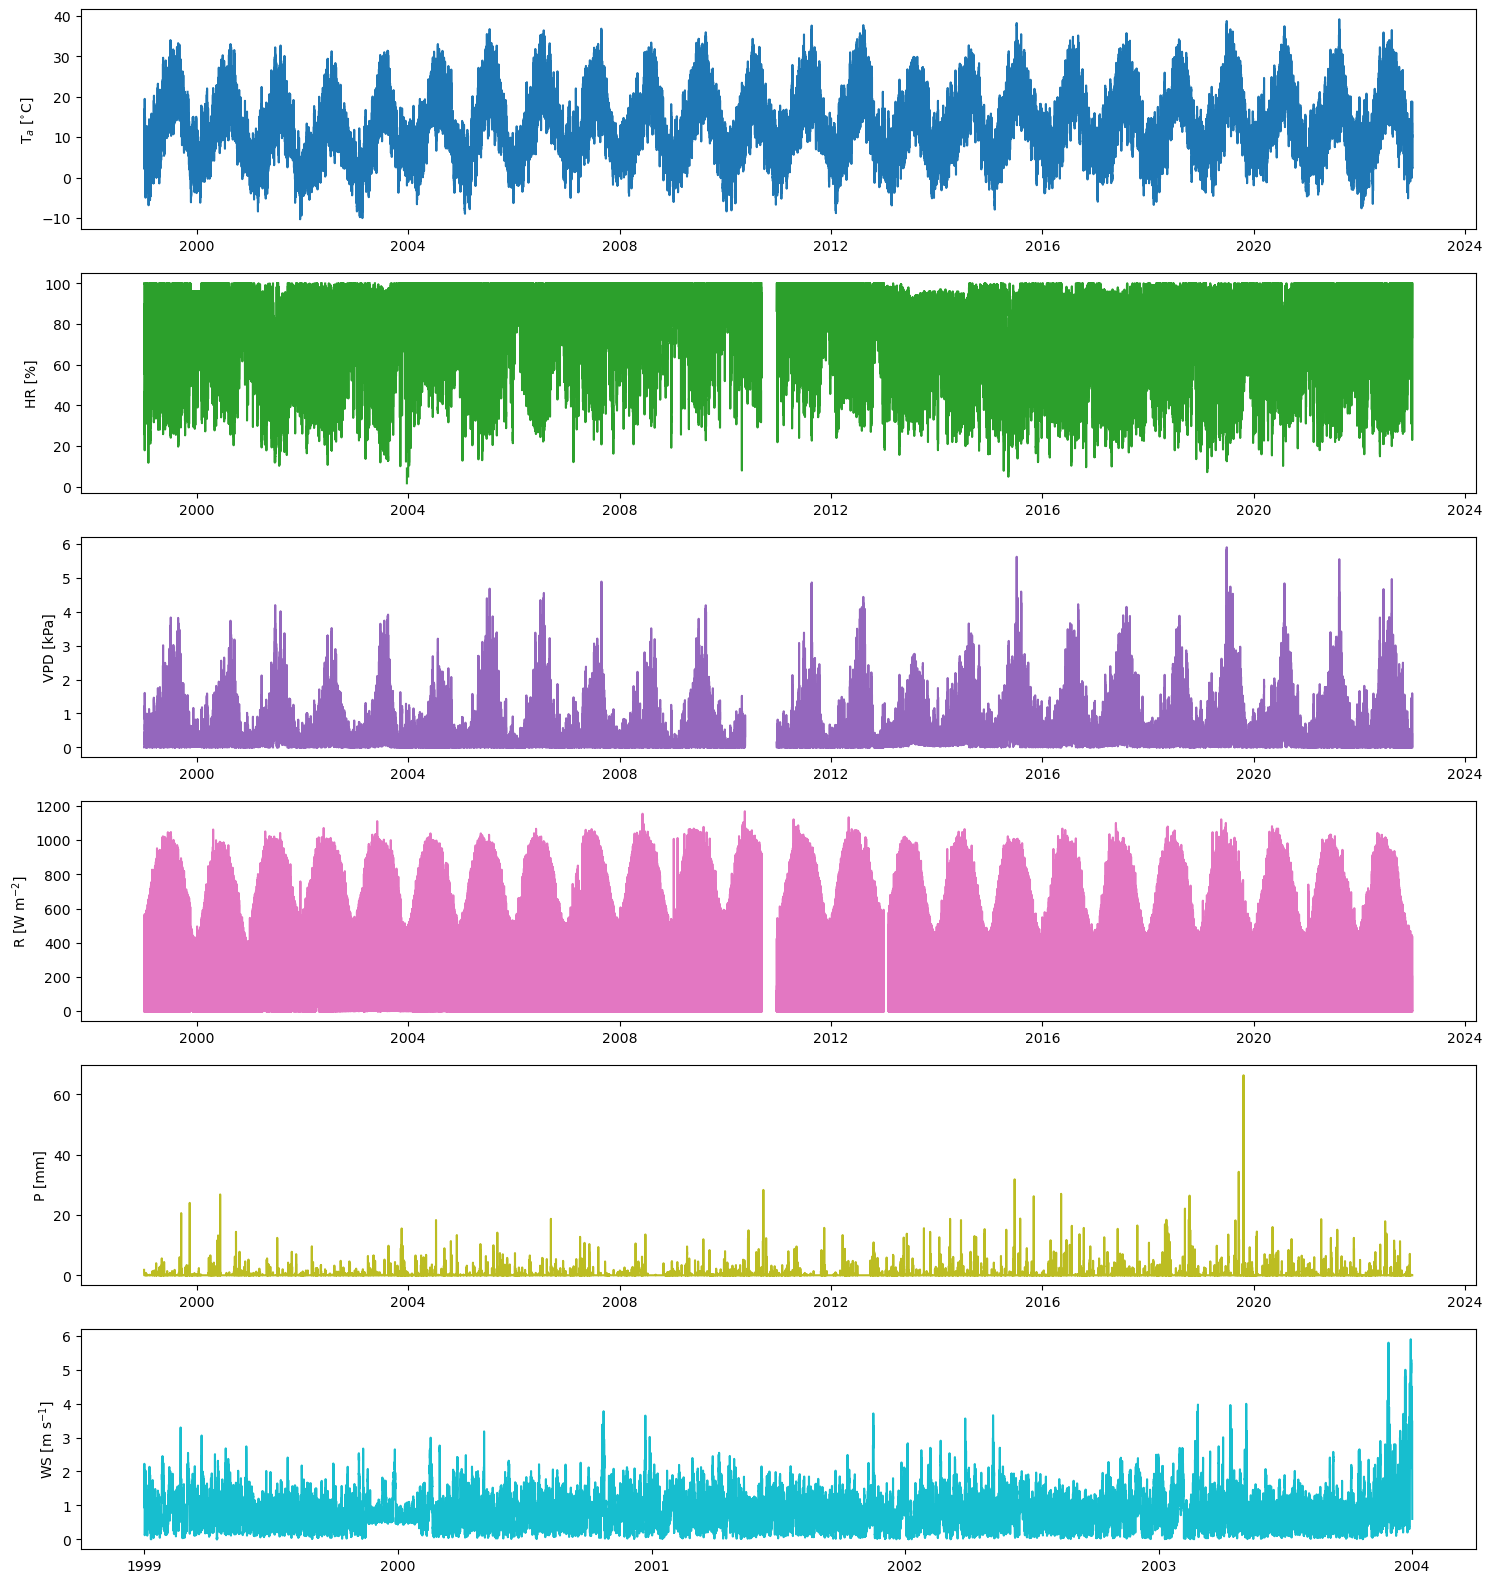

In [65]:
fig,axs=plt.subplots(6,1,figsize=[18,20])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))
axs[0].plot(data.datetime,data.Ta,color=colors[0])
axs[0].set_ylabel('T$_a$ [$^{\\circ}$C]')

axs[1].plot(data.datetime,data.HR,color=colors[1])
axs[1].set_ylabel('HR [%]')

axs[2].plot(data.datetime,data.VPD,color=colors[2])
axs[2].set_ylabel('VPD [kPa]')

axs[3].plot(data.datetime,data.R,color=colors[3])
axs[3].set_ylabel('R [W m$^{-2}$]')
                  
axs[4].plot(data.datetime,data.P,color=colors[4])
axs[4].set_ylabel('P [mm]')

#axs[5].plot(data.datetime,data.maxWS,color=colors[0])
axs[5].plot(data.datetime,data.meanWS,color=colors[5])
axs[5].set_ylabel('WS [m s$^{-1}$]')

### Soil moisture

In [67]:
data=pd.read_excel('~\\Model_Prades\\Data\\Climate\\Soil_Moisture\\SM_Prades.xlsx')

In [94]:
con=data[data.tractament=='control']
dro=data[data.tractament=='sequera']

In [92]:
con

,any,dia,parcel.la,tractament,Hum sòl (% v/v)
16,1999,1999-01-18,5,control,23.103057
17,1999,1999-01-18,5,control,24.101280
18,1999,1999-01-18,5,control,22.096166
19,1999,1999-01-18,5,control,27.032508
20,1999,1999-01-18,5,control,21.081828
...,...,...,...,...,...
4467,2023,2023-08-05,10,control,5.000000
4475,2023,2023-10-17,5,control,8.600000
4477,2023,2023-10-17,7,control,10.800000
4478,2023,2023-10-17,9,control,7.200000


## Data from field trip

### C inorganic/organic

### CO$_2$ Concentrations

### $\delta$13C

### Soil respiration 

### Incubations